## MNIST digit classification

In this project, I aim to use tensorflow to build and train a neural network which can classify written digits from 0-9.

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
%matplotlib widget
import matplotlib.pyplot as plt

# Visualising dataset

In [54]:
#load dataset from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [55]:
#normalise to get within range [0,1]
x_train = x_train/255
x_test = x_test/255

#visualising one image in ndarrray form
x_train.shape
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

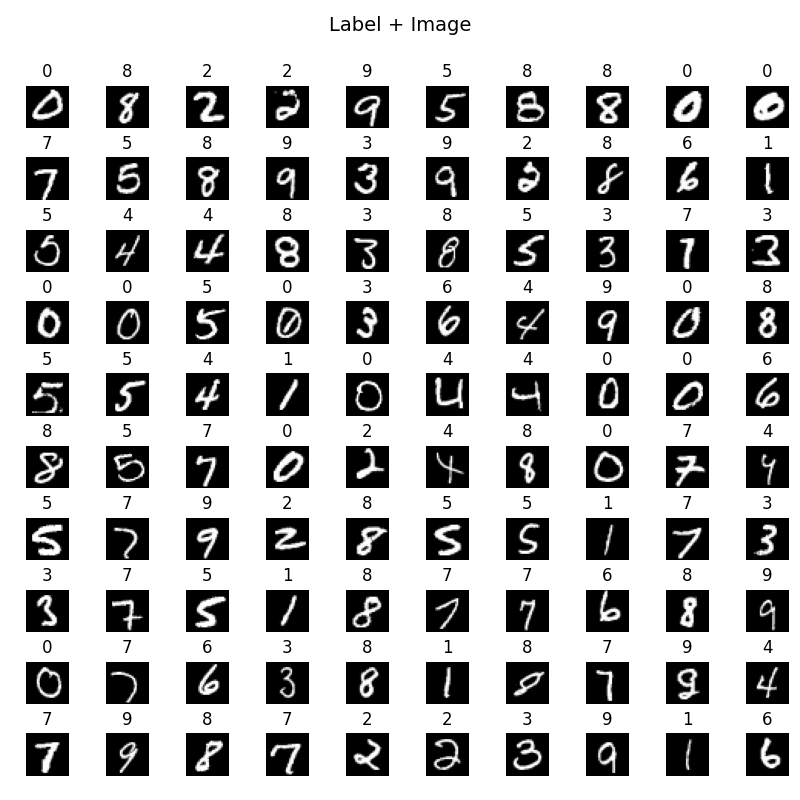

In [56]:
#visualising random images in the dataset plus their labels
m, n1, n2 = x_train.shape

fig, axes = plt.subplots(10,10, figsize=(8,8))
fig.tight_layout(pad=0, rect=[0,0,1,0.9])

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    ax.imshow(x_train[random_index], cmap='gray')
    
    ax.set_title(y_train[random_index,])
    ax.set_axis_off()
    fig.suptitle("Label + Image", fontsize=14)

# Building and Training the model

In [57]:
#flattening training data to input into dense layers
x_train_flat = x_train.reshape(x_train.shape[0], -1)

model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='linear')
])


In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)
history = model.fit(
    x_train_flat,y_train,
    epochs=20,
    validation_split = 0.2
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8330 - loss: 0.6447 - val_accuracy: 0.9222 - val_loss: 0.2892
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9256 - loss: 0.2654 - val_accuracy: 0.9378 - val_loss: 0.2239
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9396 - loss: 0.2116 - val_accuracy: 0.9482 - val_loss: 0.1905
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9486 - loss: 0.1787 - val_accuracy: 0.9522 - val_loss: 0.1739
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9559 - loss: 0.1551 - val_accuracy: 0.9569 - val_loss: 0.1531
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1367 - val_accuracy: 0.9596 - val_loss: 0.1408
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.1221 - val_accuracy: 0.9622 - val_loss: 0.1313
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9694 - loss: 0.1099 - 

# Testing and Diagnostics

Here, I analysed my model to understand accuracy of predictions, where it is struggling and whether it is overfitting

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

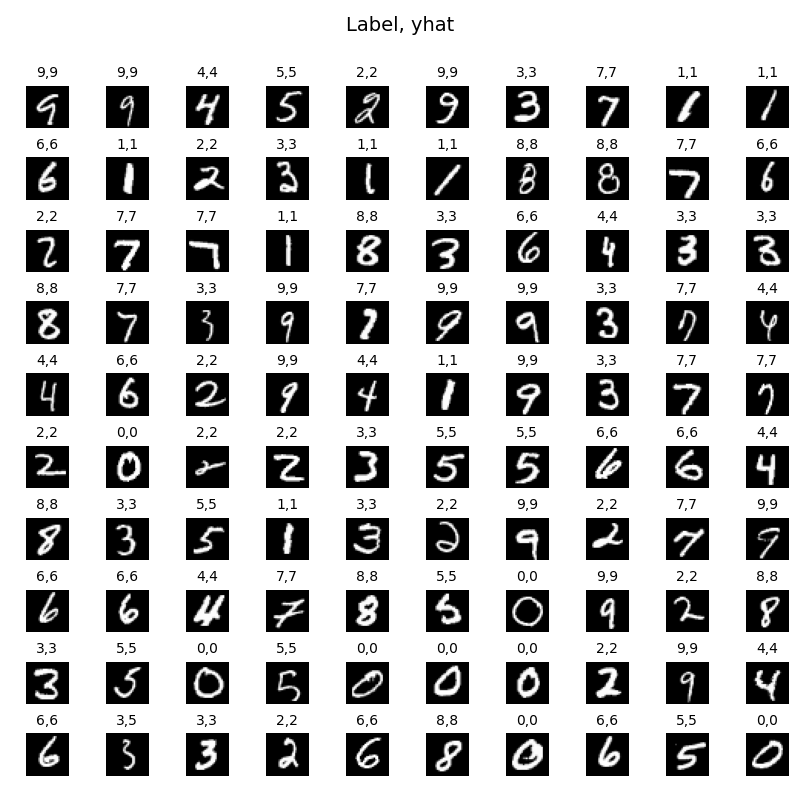

In [60]:
#visualising model accuracy using images and labels from before
m, n1, n2 = x_train.shape

fig, axes = plt.subplots(10,10, figsize=(8,8))
fig.tight_layout(pad=0, rect=[0,0,1,0.9])

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    ax.imshow(x_train[random_index], cmap='gray')

    #predict using the model
    prediction = model.predict(x_train[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    ax.set_title(f"{y_train[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

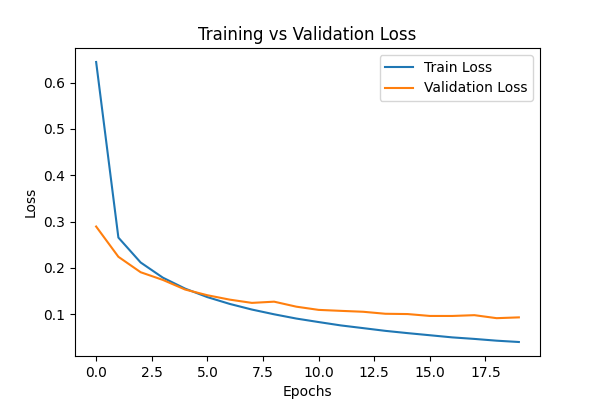

In [61]:
#plotting training and validation loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

We can see here that there is no overfitting problem since the training loss and validation loss are both decreasing with each epoch. However, at first, the model had an increasing and oscillating validation loss. In order to fix this, I reduced the number of nodes in my dense units, reduced the learning rate of the adam optimiser from 0.001 to 0.0001, and reduced the number of epochs to where validation loss stops decreasing.

In [62]:
#testing
x_test_flat = x_test.reshape(x_test.shape[0], -1)
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.9742 - loss: 0.0830


[0.08299683034420013, 0.9742000102996826]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


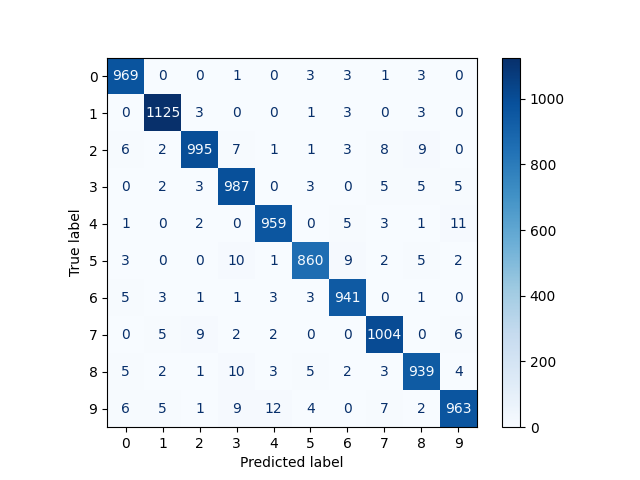

In [63]:
#visualising what digits the model is misclassifying the most
pred1 = model.predict(x_test_flat)
pred_p = tf.nn.softmax(pred1)
y_pred = np.argmax(pred_p, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.show()


We can see here that the model most commonly misclassified 4 as 9 and 7 as 1, which is reasonable, since people also tend to struggle the most with these

Number of misclassified samples: 258


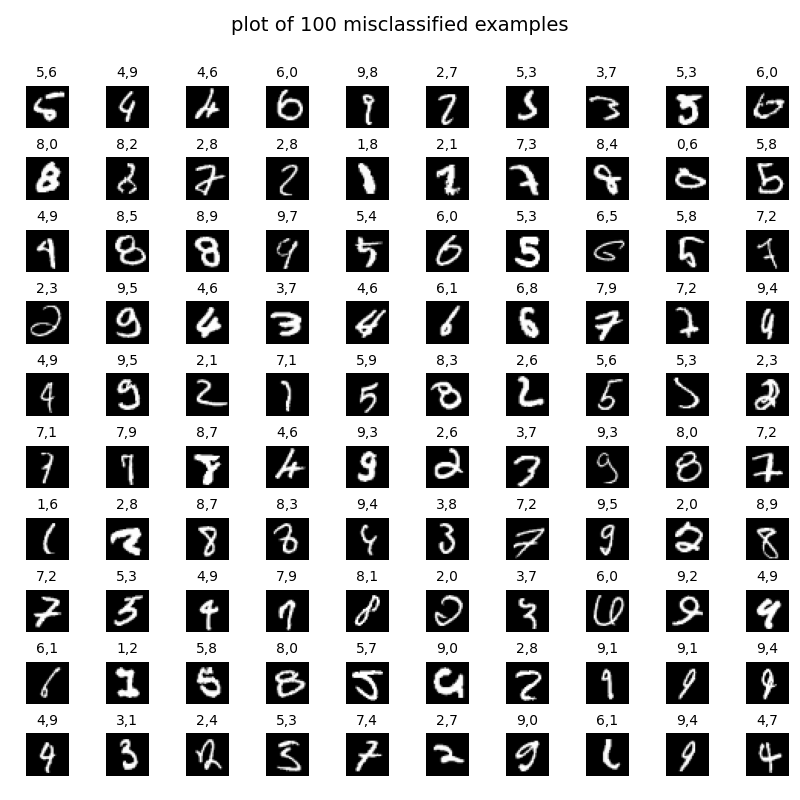

In [64]:
# visualising some misclassified images
misclassified = np.where(y_pred != y_test)[0]
print("Number of misclassified samples:", len(misclassified))

# Create grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(8,8))
fig.tight_layout(pad=0, rect=[0, 0, 1, 0.9])

for j, ax in enumerate(axes.flat):
    if j < len(misclassified):
        idx = misclassified[j]
        
        # Display the image
        ax.imshow(x_test[idx], cmap='gray')
        
        # Show true and predicted labels
        ax.set_title(f"{y_test[idx]},{y_pred[idx]}", fontsize=10)
        ax.set_axis_off()

fig.suptitle("plot of 100 misclassified examples", fontsize=14)
plt.show()


# Predictor

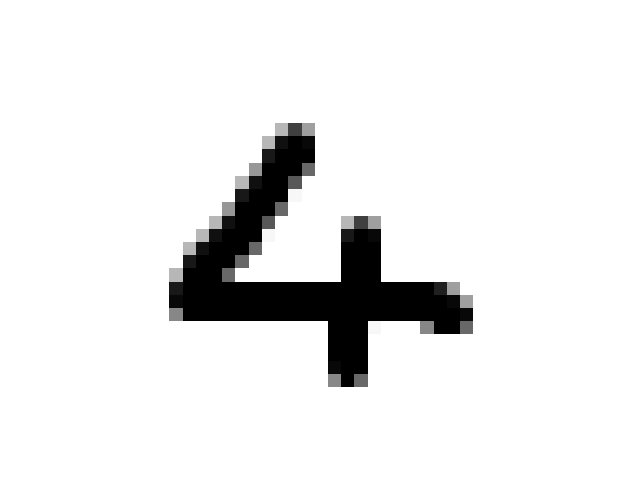

In [65]:
#visualising handwritten image
number = plt.imread('number4.png')[:,:,0]

plt.figure()
plt.imshow(number, cmap='gray')
plt.axis('off')
plt.show()

number1 = 1-number   #making black background and white writing

In [66]:
number_flat = number1.reshape(1,784)
predf = model.predict(number_flat)
pred_pf = tf.nn.softmax(predf)
number_pred = np.argmax(pred_pf, axis=1)
print(f"{'Your number is probably:'}{number_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Your number is probably:[4]


We can see here that although the accuracy on the test data is above 97%, the model struggles with identifying handwritten digits, particularly 7s and 9s, which were also the most misclassified numbers. This suggests that we need to add more data of these numbers to the training set.